In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of employees
num_employees = 5000

# Define Likert scale (1-5) weights for engagement levels
def generate_likert_scores(engagement_level="mixed"):
    """
    Generates Likert scale scores (1 to 5) based on the engagement level:
    - High: More likely to have scores of 4 and 5 (positive engagement).
    - Low: More likely to have scores of 1 and 2 (negative engagement).
    - Mixed: Balanced distribution across all scores, with emphasis on neutral responses.
    """
    if engagement_level == "high":
        return np.random.choice([4, 5], p=[0.4, 0.6])
    elif engagement_level == "low":
        return np.random.choice([1, 2], p=[0.6, 0.4])
    else:  # Mixed engagement
        return np.random.choice([1, 2, 3, 4, 5], p=[0.15, 0.15, 0.3, 0.25, 0.15])

# Generate survey responses (Q1-Q16)
def generate_q16_responses(engagement_level):
    """
    Generates responses to the Gallup Q12+ employee engagement survey based on the specified engagement level.
    The Q12+ survey consists of 16 standardized statements measuring key aspects of employee engagement.
    """
    return [generate_likert_scores(engagement_level) for _ in range(16)]

# Generate demographics and workplace metrics
def generate_employee_data(emp_id):
    """
    Generates synthetic data for a single employee, including demographic, workplace, and engagement data.
    Adjusts distributions based on realistic assumptions for the IT industry.
    """
    # Age distribution centered around 35-45 years
    age = int(np.random.normal(40, 7))
    age = max(22, min(60, age))  # Ensure age stays within 22 to 60

    # Tenure concentrated around 0-5 years
    tenure = int(np.random.normal(3, 2))
    tenure = max(0, min(age - 20, tenure))  # Ensure tenure is non-negative and realistic

    gender = random.choices(['Male', 'Female'], weights=[0.7, 0.3])[0]  # 70% Male, 30% Female
    department = random.choices(['Development', 'Support', 'QA', 'DevOps', 'Management'], 
                                weights=[0.4, 0.2, 0.15, 0.15, 0.1])[0]

    # Salary distribution peaking around $95,000-$100,000
    salary = int(np.random.normal(95000, 15000))
    salary = max(50000, min(150000, salary))  # Ensure salary stays within realistic bounds

    # Overtime assumption: 30% of employees work overtime
    overtime = random.choices(['Yes', 'No'], weights=[0.3, 0.7])[0]

    # Distance to work with 35% remote workers
    if np.random.random() < 0.35:
        distance_to_work = 0  # Remote worker
    else:
        distance_to_work = abs(np.random.normal(15, 10))  # Normally distributed distance

    # Determine engagement level to influence attrition
    engagement_level = random.choices(["high", "low", "mixed"], weights=[0.3, 0.4, 0.3])[0]
    q16_scores = generate_q16_responses(engagement_level)

    # Attrition probability based on engagement
    if engagement_level == "high":
        attrition = np.random.choice(["Yes", "No"], p=[0.1, 0.9])
    elif engagement_level == "low":
        attrition = np.random.choice(["Yes", "No"], p=[0.6, 0.4])
    else:  # Mixed engagement
        attrition = np.random.choice(["Yes", "No"], p=[0.3, 0.7])

    # Return all data as a dictionary
    return {
        'Employee_ID': emp_id,
        'Q1': q16_scores[0], 'Q2': q16_scores[1], 'Q3': q16_scores[2], 'Q4': q16_scores[3],
        'Q5': q16_scores[4], 'Q6': q16_scores[5], 'Q7': q16_scores[6], 'Q8': q16_scores[7],
        'Q9': q16_scores[8], 'Q10': q16_scores[9], 'Q11': q16_scores[10], 'Q12': q16_scores[11],
        'Q13': q16_scores[12], 'Q14': q16_scores[13], 'Q15': q16_scores[14], 'Q16': q16_scores[15],
        'Age': age, 'Tenure': tenure, 'Gender': gender, 'Department': department,
        'Salary': salary, 'Overtime': overtime, 'Distance_to_Work': round(distance_to_work, 2),
        'Attrition': attrition
    }

# Generate the dataset
data = [generate_employee_data(emp_id) for emp_id in range(1, num_employees + 1)]

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the dataset to CSV for further use
df.to_csv("employee_attrition_synthetic_IT.csv", index=False)
#print("Synthetic IT dataset saved to 'employee_attrition_synthetic_IT.csv'")

# Save the dataset to the specified path
output_path = r"C:\Users\alexa\OneDrive\AlexPerez\Dokumente\2 Soros\Data Science\Projects\employee_attrition_Dec24\data\raw\employee_attrition_synthetic_IT.csv"
df.to_csv(output_path, index=False)
print(f"Synthetic IT dataset saved to '{output_path}'")

Synthetic IT dataset saved to 'C:\Users\alexa\OneDrive\AlexPerez\Dokumente\2 Soros\Data Science\Projects\employee_attrition_Dec24\data\raw\employee_attrition_synthetic_IT.csv'


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       5000 non-null   int64  
 1   Q1                5000 non-null   int32  
 2   Q2                5000 non-null   int32  
 3   Q3                5000 non-null   int32  
 4   Q4                5000 non-null   int32  
 5   Q5                5000 non-null   int32  
 6   Q6                5000 non-null   int32  
 7   Q7                5000 non-null   int32  
 8   Q8                5000 non-null   int32  
 9   Q9                5000 non-null   int32  
 10  Q10               5000 non-null   int32  
 11  Q11               5000 non-null   int32  
 12  Q12               5000 non-null   int32  
 13  Q13               5000 non-null   int32  
 14  Q14               5000 non-null   int32  
 15  Q15               5000 non-null   int32  
 16  Q16               5000 non-null   int32  


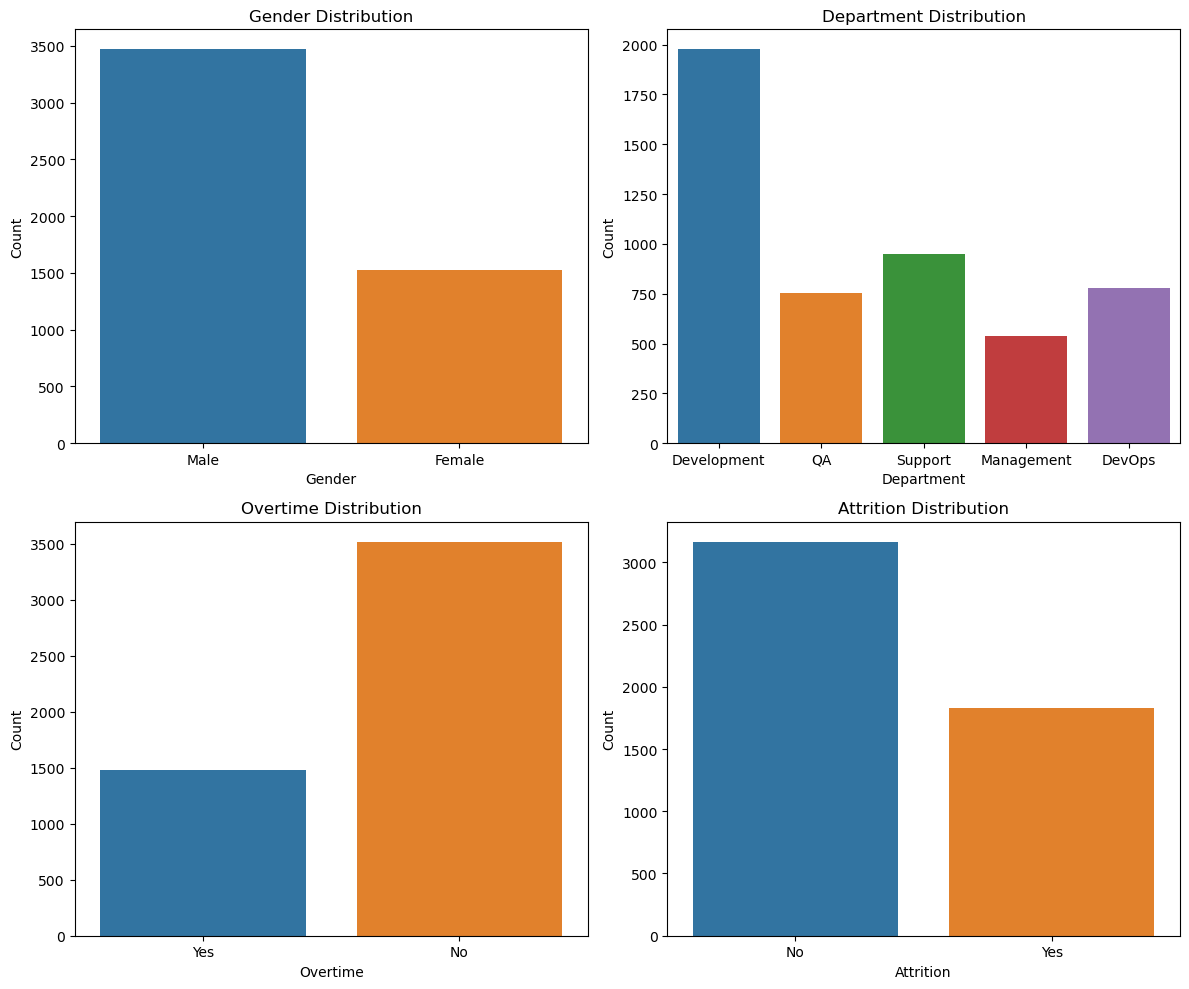

In [12]:
# Visualization of categorical variables
def plot_categorical_distributions(df):
    plt.figure(figsize=(12, 10))
    
    # Gender Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(x='Gender', data=df)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Department Distribution
    plt.subplot(2, 2, 2)
    sns.countplot(x='Department', data=df)
    plt.title('Department Distribution')
    plt.xlabel('Department')
    plt.ylabel('Count')
    
    # Overtime Distribution
    plt.subplot(2, 2, 3)
    sns.countplot(x='Overtime', data=df)
    plt.title('Overtime Distribution')
    plt.xlabel('Overtime')
    plt.ylabel('Count')
    
    # Attrition Distribution
    plt.subplot(2, 2, 4)
    sns.countplot(x='Attrition', data=df)
    plt.title('Attrition Distribution')
    plt.xlabel('Attrition')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_categorical_distributions(df)

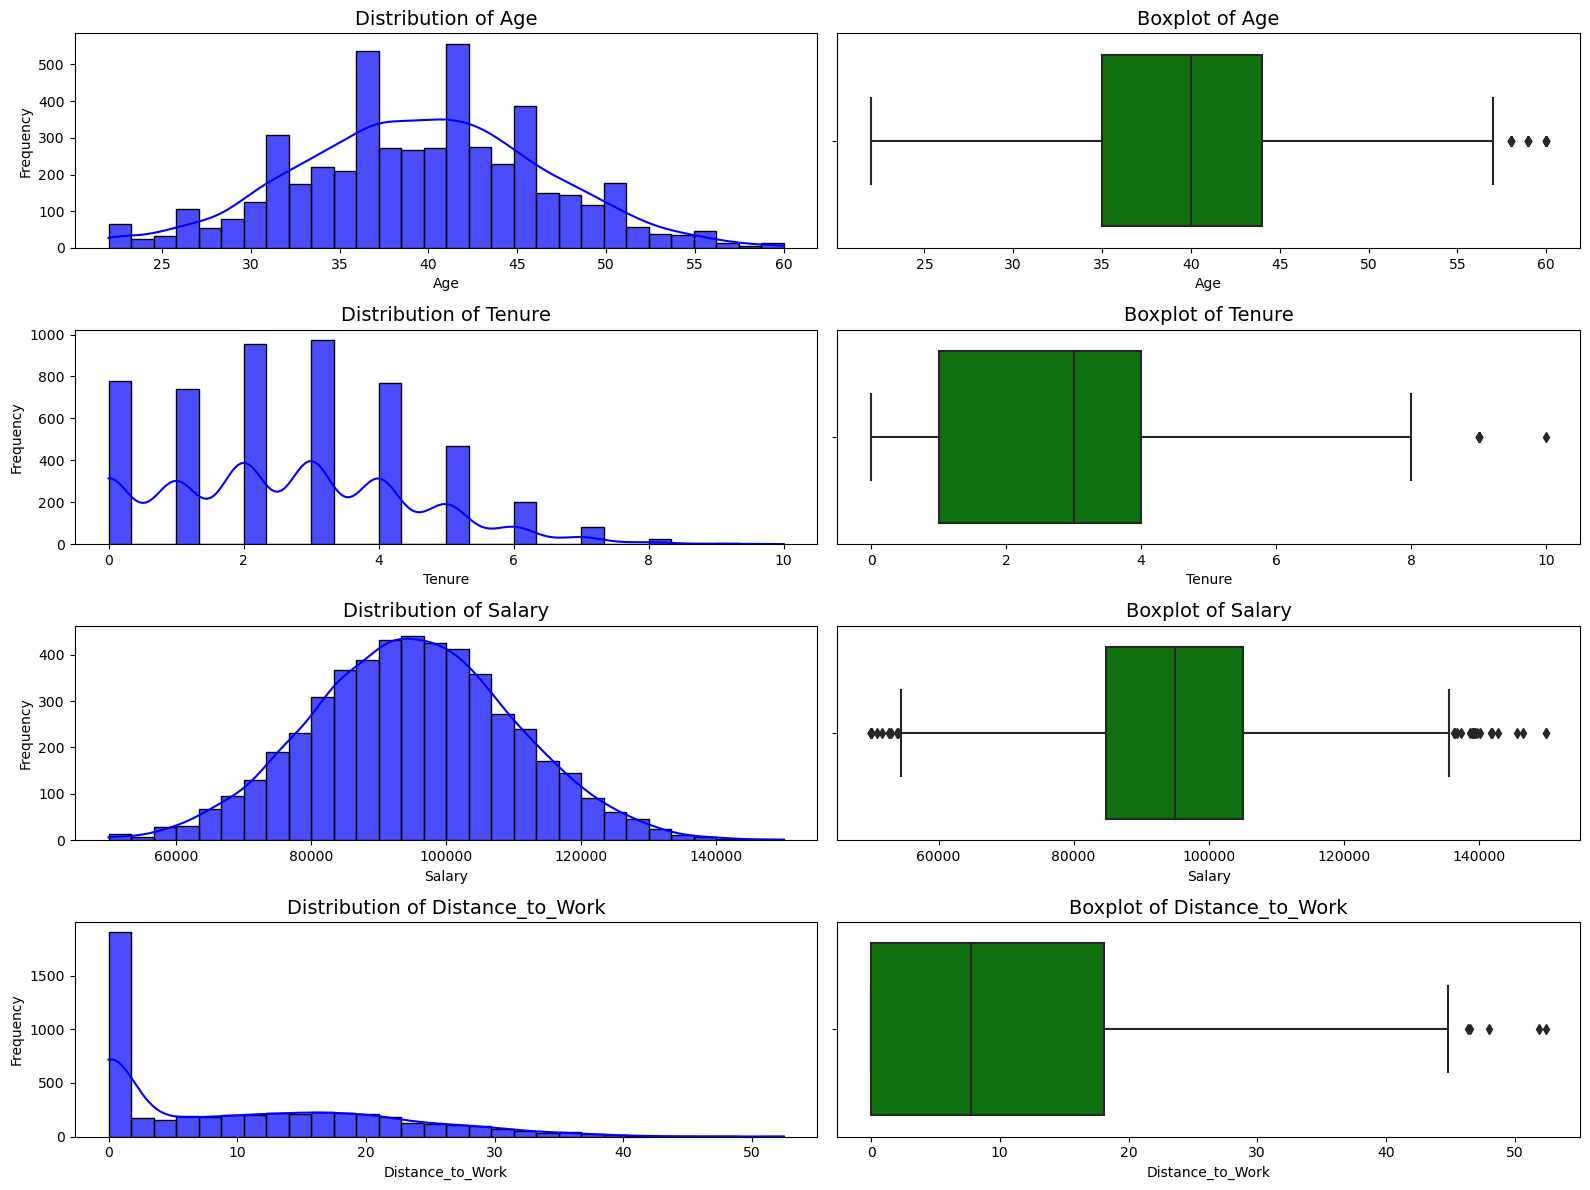

In [13]:
# Function to visualize numerical variables
def visualize_numeric_variables(df, columns):
    plt.figure(figsize=(16, 12))

    for i, column in enumerate(columns):
        # Histogram
        plt.subplot(len(columns), 2, 2*i + 1)
        sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(len(columns), 2, 2*i + 2)
        sns.boxplot(x=df[column], color='green')
        plt.title(f'Boxplot of {column}', fontsize=14)
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_visualize = ['Age', 'Tenure', 'Salary', 'Distance_to_Work']

# Call the function
visualize_numeric_variables(df, columns_to_visualize)